# **Gradiente Descendente**

Neste material, será tratado o conteúdo referente ao gradiente descendente, o qual é aplicado em inúmeros algoritmos de Machine Learning. Este é utilizado para minimizar a função de custo. Dessa maneira, a regressão linear é um bom começo para compreender a questão da minimização desta função. A princípio, iremos utilizar a MSE (Mean Squared) como função de referência para cálculo do erro.

## **Implementação com a função y = 2*x , ou seja, com apenas um atributo**

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from pylab import *
import random

%matplotlib inline

In [8]:
np.random.seed(1234)

In [9]:
# Número de exemplos
N = 1000

In [10]:
# Input values (features)
x1 = 10.0 * np.random.rand(N, 1)

# True function
y = 2.0*x1

# Observable function
# Output values (targets)
# Gaussian noisy added to function
y_noisy = y + 10.0 * np.random.randn(N, 1)

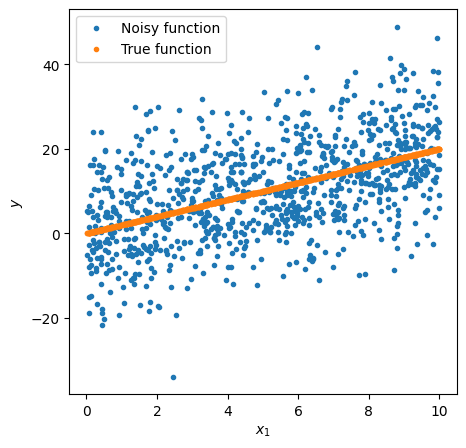

In [11]:
# Showing the true and noisy function
fig = plt.figure(figsize=(5,5))
plt.plot(x1, y_noisy, '.', label='Noisy function')
plt.plot(x1, y, '.', label='True function')
plt.xlabel('$x_1$')
plt.ylabel('$y$')
plt.legend()
plt.show()

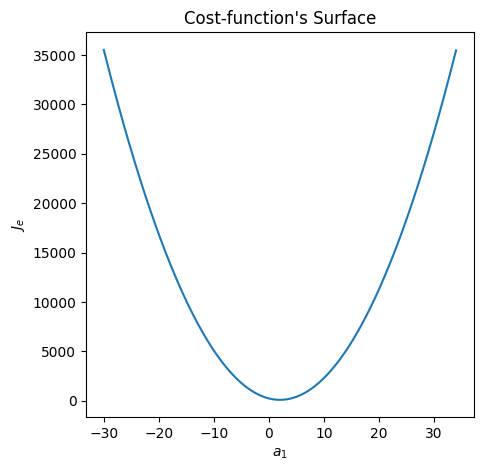

In [12]:
# Generate values for parameters
M = 200
A1 = np.linspace(-30.0, 34.0, M)

# Generate points for plotting the cost-function surface
J = np.zeros((M))

for iter1 in range(0, M):
    yhat = A1[iter1]*x1
    J[iter1] = (1.0/N)*np.sum(np.square(y_noisy-yhat))
    
# Plot cost-function surface (in this case we have one variable (a1))
fig = plt.figure(figsize=(5,5))
plt.plot(A1, J)
plt.xlabel('$a_1$')
plt.ylabel('$J_e$')
plt.title('Cost-function\'s Surface')

# Show the plot
plt.show()

In [13]:
# Closed-form solution
a1_opt = np.linalg.pinv(np.transpose(x1).dot(x1)).dot(np.transpose(x1).dot(y_noisy))

yhat = a1_opt*x1

Joptimum = (1.0/N)*np.sum(np.power((y_noisy-yhat),2))

print(Joptimum)

99.43362282057217


## **Solução com Gradiente Descendente**

In [14]:
# Maximum number of iteration
maxNumIter = 10000

# Learning step
alpha = 0.01

# Create empty structures
a1_hist = np.zeros((maxNumIter))
Jgd = np.zeros(maxNumIter)

a1 = -30

a1_hist[0] = a1

yhat = a1 * x1

Jgd[0] = (1.0/N)*np.sum(np.power((y_noisy - yhat),2))

error = 1
iteration = 0

while(error > 0.000000000001 and iteration < maxNumIter+1):
    # Calculate the valur of the function for the a1
    h = a1 * x1
    
    # Derivada parcial da função de erro com relação ao peso a1
    update = -(2.0/N)*x1.T.dot(y_noisy - h)
    
    # Atualizao valor do a1 utilizando o método do gradiente descendente, caminhando em direção ao ponto de mínimo da função de erro
    a1 = a1 - alpha * update
    
    # Obtendo o histórico dos valores assumidos por a1
    a1_hist[iteration+1] = a1
    
    # Recalcula a função hipótese
    yhat = a1 * x1
    
    # Calcula o erro quadrático médio para a função hipótese e armazena no histórico dos valores 
    Jgd[iteration+1] = (1.0/N)*sum(np.power((y_noisy - yhat),2))
    
    # Calcula a diferença dos valores de erro entre a iteração anterior e a atual iteração (é utilizado como condição de parada)
    error = np.abs(Jgd[iteration]-Jgd[iteration+1])
    
    iteration += 1

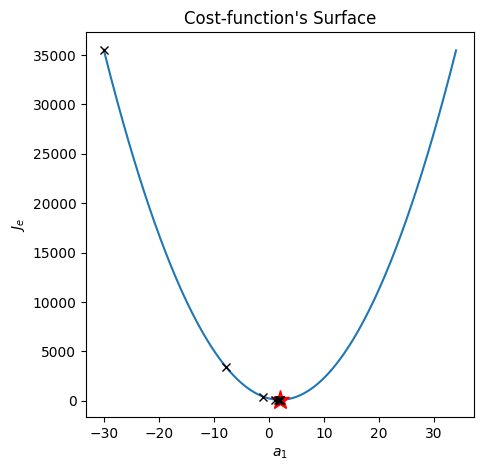

In [15]:
# Plot cost-function surface
fig = plt.figure(figsize=(5,5))
plt.plot(A1, J)
plt.xlabel('$a_1$')
plt.ylabel('$J_e$')
plt.title('Cost-function\'s Surface')
plt.plot(a1_opt[0], Joptimum, c='r', marker='*', markersize=14)
plt.plot(a1_hist[0:iteration], Jgd[0:iteration], 'kx')

# Show the plot
plt.show()

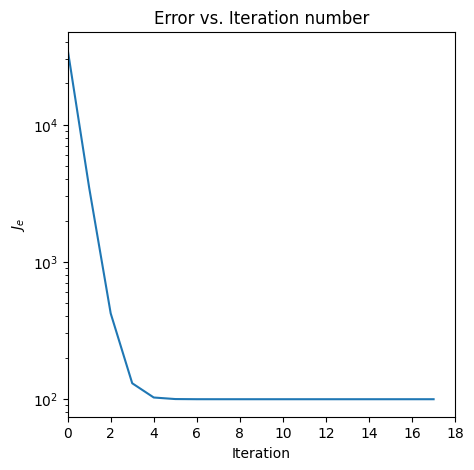

In [16]:
fig = plt.figure(figsize=(5,5))
plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0,iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')

plt.show()

In [17]:
# Valor de a1 obtido utilizando o gradiente descendente
print(a1[0][0])
# Valor de a1 obtido utilizando a forma fechado (direto com as matrizes)
print(a1_opt[0][0])

2.012784513428278
2.0127845339946164


## **Implementação com a função y = 2*X1 + 2*X2, ou seja, com apenas dois atributos**

In [31]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib
from pylab import *
import numpy as np
import random

%matplotlib notebook

In [32]:
# Resetando o gerador de valores aletórios para sempre gerar os mesmos valores
np.random.seed(1234)

In [33]:
# Número de exemplos
N = 1000

In [46]:
# Valores de entrada de x1 e x2. Valores que seguem a distrição gaussiana e desvio padrão iguala a 10
x1 =  10 * np.random.randn(N, 1)
x2 =  10 * np.random.randn(N, 1)

# Função verdadeira
y = 2.0*x1 + 2.0*x2

# Função observável, ou seja, a função ruído com valores que seguem a distrição gaussiana e desvio padrão iguala a 10
y_noisy = y + 10.0*np.random.randn(N, 1)

In [47]:
# Gerar o valores do parametros para, assim, plotar a superfície de erro
M = 200
a1 = np.linspace(-30.0, 34.0, M)
a2 = np.linspace(-30.0, 34.0, M)

A1, A2 = np.meshgrid(a1, a2)

# Gerar os valores a serem plotados para a função de erro
J = np.zeros((M,M))

for iter1 in range(0, M):
    for iter2 in range(0, M):
        # Calcula a função hipótese
        yhat = A1[iter1][iter2]*x1 + A2[iter1][iter2]*x2
        # Calcula o valor da função de erro
        J[iter1][iter2] = (1.0/N)*np.sum(np.square(y_noisy-yhat))

<IPython.core.display.Javascript object>


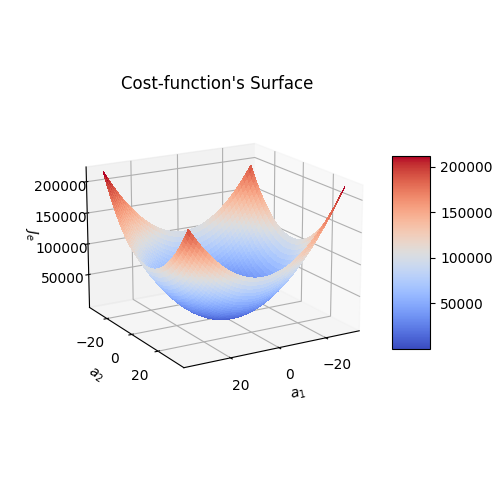

/tmp/ipykernel_13000/2244619340.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


In [48]:
# Plotando o gráfico da superfície de erro
fig = plt.figure(figsize=(5,5))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap = cm.coolwarm, linewidth=0, antialiased=False)

# Adicionando a barra de cores
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('$a_1$')
ax.set_ylabel('$a_2$')
ax.set_zlabel('$J_e$')

plt.title('Cost-function\'s Surface')

ax.view_init(20,45)

# Exibe o gráfico
plt.show()

In [51]:
# Solução na forma fechada
# Concatenando os vetores x1 e x2 sem o peso de BIAS (Utilizando apenas os pesos, visto que a função não possui BIAS)
X = np.c_[x1,x2]

a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y_noisy))

yhat = X.dot(a_opt)

Joptimum = (1.0/N)*np.sum(np.power((y_noisy - yhat),2))

In [54]:
# Solução com no máximo 10000 iterações
maxNumIter = 10000

# Valor do passo de aprendizagem
alpha = 0.004 # Valor empírico "ótimo".
#alpha = 0.0001 # Valor muito pequeno, convergência lenta até o ponto de mínimo da função de erro
#alpha = 0.008  # Valor muito grande, convergência não ocorre até o ponto de mínimo da função de erro. O algoritmo diverge!!

# Criando as estruturas vazias
a_hist = np.zeros((2, maxNumIter))
Jgd = np.zeros(maxNumIter)

a = np.array([-30.0, -30.0]).reshape(2,1)
a_hist[:, 0] = a.reshape(2,)

yhat = X.dot(a)

Jgd[0] = (1.0/N)*sum(np.power((y_noisy - yhat), 2))

error = 1
iteration = 0

while(error > 0.0001 and iteration < maxNumIter+1):
    h = X.dot(a)
    
    
    # Já possui a derivada parcial em relação ao a1 e em realção ao a2
    update = -(2.0/N)*X.T.dot(y_noisy - h)
    
    a = a - alpha*update
    
    a_hist[:, iteration+1] = a.reshape(2,)
    
    yhat = X.dot(a)
    
    Jgd[iteration+1] = (1.0/N)*sum(np.power((y_noisy - yhat), 2))
    
    error = np.abs(Jgd[iteration] - Jgd[iteration+1])
    
    iteration += 1
    

<IPython.core.display.Javascript object>


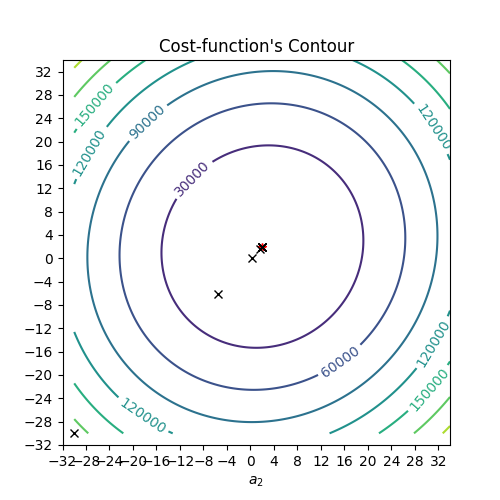

In [55]:
fig = plt.figure(figsize = (5,5))

cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$')
plt.xlabel('$a_2$')

plt.title('Cost-function\'s Contour')

plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')

plt.xticks(np.arange(-32, 34, step=4.0))
plt.yticks(np.arange(-32, 34, step=4.0))
plt.show()